<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 2 - Exploratory Data Analysis 📌
</div>

## **IMPORT LIBRARY** 🎄

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **EXPLORING DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 1: Đọc dữ liệu đã được tiền xử lý 🔥
</div>

In [3]:
df = pd.read_csv('../../Data/2425_QC_cleaned.csv')
df.head(10)

,Ad Topic Line,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,City,Country,Clicked on Ad,Timestamp
0,Cloned 5thgeneration orchestration,61833.90,0,35,68.95,256.09,Wrightburgh,Tunisia,0,2016-03-27 00:53:00
1,Monitored national standardization,68441.85,1,31,80.23,193.77,West Jodi,Nauru,0,2016-04-04 01:39:00
2,Organic bottom-line service-desk,59785.94,0,26,69.47,236.50,Davidton,San Marino,0,2016-03-13 20:35:00
3,Triple-buffered reciprocal time-frame,54806.18,1,29,74.15,245.89,West Terrifurt,Italy,0,2016-10-01 02:31:00
4,Robust logistical utilization,73889.99,0,35,68.37,225.58,South Manuel,Iceland,0,2016-03-06 03:36:00
5,Sharable client-driven software,59761.56,1,23,59.99,226.74,Jamieberg,Norway,0,2016-05-19 14:30:00
6,Enhanced dedicated support,53852.85,0,33,88.91,208.36,Brandonstad,Myanmar,0,2016-01-28 20:59:00
7,Reactive local challenge,24593.33,1,48,66.00,131.76,Port Jefferybury,Australia,1,2016-07-03 01:40:00
8,Configurable coherent function,68862.00,1,30,74.53,221.51,West Colin,Grenada,0,2016-04-18 09:33:00
9,Mandatory homogeneous architecture,55642.32,1,20,69.88,183.82,Ramirezton,Ghana,0,2016-11-07 01:42:00


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 2: Phân tích các cột dữ liệu số sử dụng Descriptive Statistics 🔥
</div>

Descriptive Statistics cho thấy các đặc điểm của các cột dữ liệu số. Nó cho chúng ta thấy những thông tin như:
- Mean (Giá trị trung bình)
- Median (Giá trị trung vị)
- Mode (Giá trị yếu vị)
- Quantiles (Các phân vị): Quartiles (Tứ phân vị)
- Range và IQR (Interquartile Range)
- Variance (Phương sai) và Standard deviation (Độ lệch chuẩn)
- Coefficient of Variation (Hệ số biến thiên)
- Skewness (Độ lệch)
- Standard Error (Sai số chuẩn)
- Correlation (Hệ số tương quan)

In [ ]:
numerical_columns = ['Area Income',	'Age', 'Daily Time Spent on Site', 'Daily Internet Usage']
df_copy = df[numerical_columns].copy()
df_copy.describe()

,Area Income,Age,Daily Time Spent on Site,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55025.321364,36.018000,65.000200,180.000100
std,13343.228619,8.779907,15.853615,43.902339
min,19373.553750,19.000000,32.600000,104.780000
25%,47031.802500,29.000000,51.360000,138.830000
50%,57012.300000,35.000000,68.215000,183.130000
75%,65470.635000,42.000000,78.547500,218.792500
max,79484.800000,61.000000,91.430000,269.960000


📊 `Trực quan hoá phân phối`

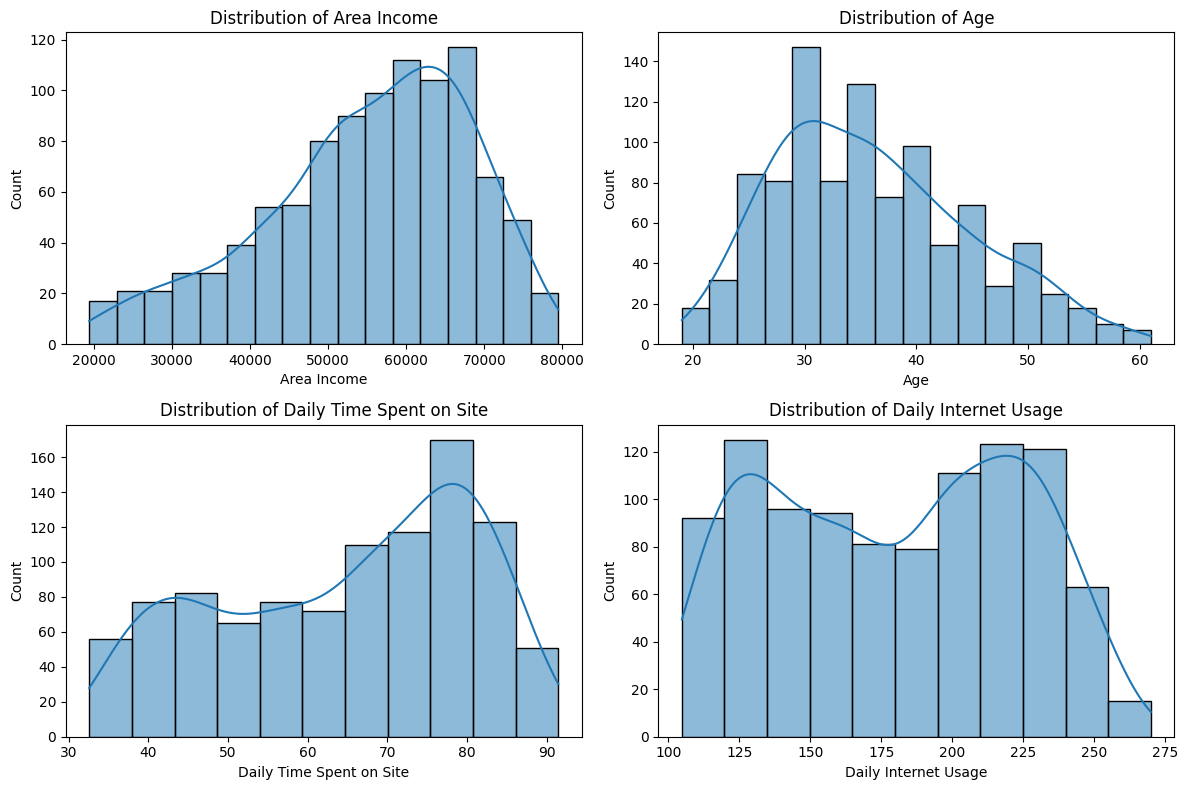

In [ ]:
# Create subplots - 2 rows, 2 columns for 4 features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjusting the figure size and grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Plot histogram and KDE in the i-th subplot
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


📏 `Tính toán độ lệch (skewness)`

In [ ]:
skewness = df[numerical_columns].skew()
skewness

Area Income                -0.620982
Age                         0.478471
Daily Time Spent on Site   -0.371760
Daily Internet Usage       -0.033537
dtype: float64

📈`NHẬN XÉT:`
- Dựa vào kết quả phân tích ở trên, chúng ta có thể thấy rẳng các giá trị `Daily Time Spent on Site`, `Area Income`, `Age`, có xu hướng phân bố không đồng đều, một ví dụ điển hình là có đuôi dài hơ.

- Trong khi đó, giá trị `Daily Internet Usage` được phân bố khá đồng đều và chỉ lõm ở một phần nhỏ ở giữa biểu đồ. 

- Ngoài ra, kết quả tính toán độ lệch (skewness) cũng cho thấy `Daily Internet Usage` có giá trị độ lệch gần nhất với 0, trong khi `Daily Time Spent on Site`, `Age` và `Area Income` rất xa 0.

### **Quan sát** 💬

Mọi số liệu thống kê đều ổn định và không gặp bất cứ vấn đề gì.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 3: Phân tích đơn biến trong các cột dữ liệu số 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 4: Mô tả mối tương quan giữa các cột trong tập dữ liệu 🔥
</div>

Bây giờ chúng ta sẽ xem xét các cột dữ liệu có sẵn trong tập dữ liệu để xác định và phân tích mối quan hệ giữa chúng. Sau đó là xác định những cột dữ liệu nào trong tập dữ liệu đóng góp đáng kể cho mục tiêu của chúng ta.  

Bằng cách tính toán và trực quan hóa, Python cho phép chúng ta tạo ma trận tương quan, đây là bảng biểu thị các hệ số tương quan giữa các biến khác nhau.

### **Ma trận tương quan**

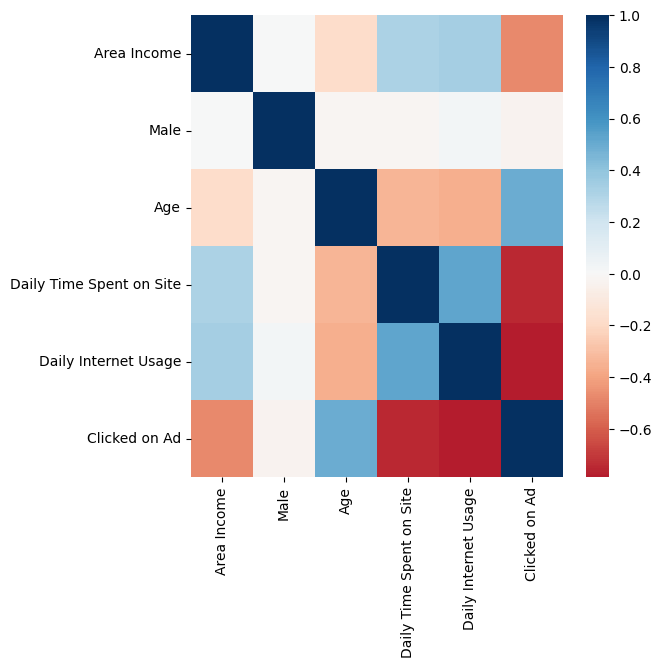

In [12]:
df_copy = df.select_dtypes(include='number')
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

### **Bảng hệ số tương quan**

In [8]:
df_copy.corr()

,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
Area Income,1.000000,0.002524,-0.184454,0.312198,0.339280,-0.476905
Male,0.002524,1.000000,-0.022045,-0.018951,0.028012,-0.038027
Age,-0.184454,-0.022045,1.000000,-0.333021,-0.367484,0.493874
Daily Time Spent on Site,0.312198,-0.018951,-0.333021,1.000000,0.518658,-0.748117
Daily Internet Usage,0.339280,0.028012,-0.367484,0.518658,1.000000,-0.786539
Clicked on Ad,-0.476905,-0.038027,0.493874,-0.748117,-0.786539,1.000000


### **Quan sát** 💬
- Có một vài cột dữ liệu có mỗi tương quan khá mạnh với những cột khác, điển hình như là `Clicked on Ad`, Daily `Time Spent on Site`, `Daily Internet Usage`.
- Các cột khác như `Clicked on Ad`, `Area Income`, `Age`, có hệ số tương quan ở mức vừa phải.
- Còn lại các cột khác thì có hệ số tương quan khá yếu.

there are some features that seem to have strong correlation with each other, namely `Like`, `View`, `Charted-duration`, `Most view per day`. Other features, in constrast, correlate quite weak.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 5: Phân tích hai biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 6: Phân tích đa biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...